# Содержание
* 1. [Задания](#Задания)<br>
    * 1.1 [Задание 1](#Задание-1)<br>
    * 1.2 [Задание 2](#Задание-2)<br>
    * 1.3 [Задание 3](#Задание-4)<br>
    * 1.4 [Задание 4](#Задание-7)<br>
    * 1.5 [Задание 5](#Задание-3)<br>
    * 1.6 [Задание 6](#Задание-5)<br>
    * 1.7 [Задание 7](#Задание-6)<br>


# Задания<a class="anchor" style="autocontent" id="Задания"/><br>

In [1]:
!pip install gdown
!pip install optuna
!pip install catboost
!pip install pytorch-tabnet
!pip install -U imbalanced-learn

     |████████████████████████████████| 308 kB 8.5 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 209 kB 77.3 MB/s 
     |████████████████████████████████| 75 kB 4.9 MB/s 
     |████████████████████████████████| 144 kB 60.8 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 111 kB 60.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=3956e33cab21381bc5012a1f37923354c4479cf32bc8f3c9a08f0d07121d2965
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 76.4 MB 24 kB/s 
     |████████████████████████████████| 189 kB 8.0 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.pos

In [2]:
import catboost
import itertools
import imblearn
import lightgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import scipy
import seaborn as sns
import sklearn
import sklearn.datasets
import xgboost

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import average_precision_score, matthews_corrcoef
from pytorch_tabnet.tab_model import TabNetRegressor

In [3]:
from  sklearn.metrics.mean_squared_error 

SyntaxError: ignored

## Задание 1. Bias-variance trade-off<a class="anchor" style="autocontent" id="Задание-1"/><br>

Продемонстрируйте bias-variance trade-off для `DecisionTreeRegressor` при изменении глубины дерева. Постройте регрессионную модель функции от одной независимой переменной, представленной в ячейке ниже, используя функцию plot_regression_predictions (можете модифицировать).

In [6]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1) * 3 - 1
y = 4 * (X - 0.5) ** 3
y = y + np.random.randn(m, 1) / 10

In [7]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -1, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    

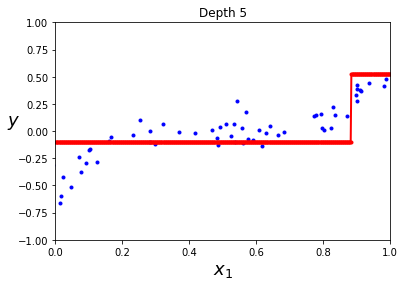

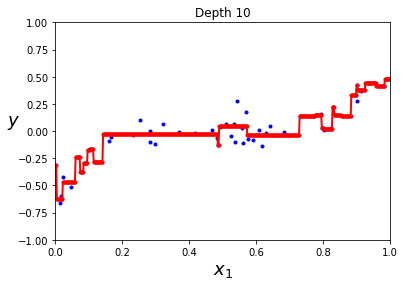

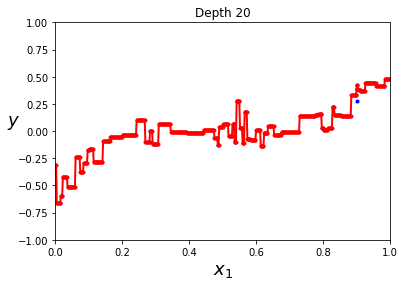

In [10]:
## ENTER YOUR CODE HERE ##
for d in [5,10,20]:

  tree_reg = DecisionTreeRegressor(max_depth = d, random_state = 0)
  tree_reg = tree_reg.fit(X,y)
  plot_regression_predictions(tree_reg, X, y)
  plt.title('Depth ' + str(d))
  plt.show()

## Задание 2. Bootstrap<a class="anchor" style="autocontent" id="Задание-2"/><br>

В этом задании используйте датасет breast_cancer &mdash; классический датасет для заздачи бинарной классификации. Обучите модели `DecisionTreeClassifier`, `RandomForestClassifier`, `LigthGBMClassifier`, `SVC` и `BaggingClassifier` с базовым класификатором - SVC . Параметры моделей можете оставить по умолчанию или задать сами.

Для каждой модели посчитайте корреляцию Мэтьюса &mdash; мерику для оценки качества бинарной классификации, в частности, устойчивую к дисбалансу классов, (`sklearn.metrics.matthews_corrcoef`, подробнее почитать про его пользу можно [здесь](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7)) для предсказанного ею класса и реального 

С помощью bootstrap-подхода постройте 90% доверительные интервалы для качества полученных моделей. Используйте функцию bootstrap metric из лекции.

Постройте боксплоты для качества полученных моделей

In [14]:
def bootstrap_metric(x, 
                     y,
                     metric_fn,
                     samples_cnt = 1000,
                     alpha = 0.05,
                     random_state = 42):
    size = len(x)
    
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)
        
        x_boot = x[poses]
        y_boot = y[poses]
        
        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val
    
    return b_metric

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
print(breast_cancer.DESCR)

In [12]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
qual = sklearn.metrics.matthews_corrcoef(y_pred, y_test)


In [29]:
## ENTER YOUR CODE HERE ##
boot_DT = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: sklearn.metrics.matthews_corrcoef(y_true=x, y_pred=y),alpha = 0.1)


In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
qual = sklearn.metrics.matthews_corrcoef(y_pred, y_test)
boot_RFC = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: sklearn.metrics.matthews_corrcoef(y_true=x, y_pred=y),alpha = 0.1)

In [31]:
model = lightgbm.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
qual = sklearn.metrics.matthews_corrcoef(y_pred, y_test)
boot_LC = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: sklearn.metrics.matthews_corrcoef(y_true=x, y_pred=y),alpha = 0.1)

In [32]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
qual = sklearn.metrics.matthews_corrcoef(y_pred, y_test)
boot_SVC = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: sklearn.metrics.matthews_corrcoef(y_true=x, y_pred=y),alpha = 0.1)

In [33]:
model = BaggingClassifier(SVC(), 
                               n_estimators=100,
                               random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
qual = sklearn.metrics.matthews_corrcoef(y_pred, y_test)
boot_Bag = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: sklearn.metrics.matthews_corrcoef(y_true=x, y_pred=y),alpha = 0.1)

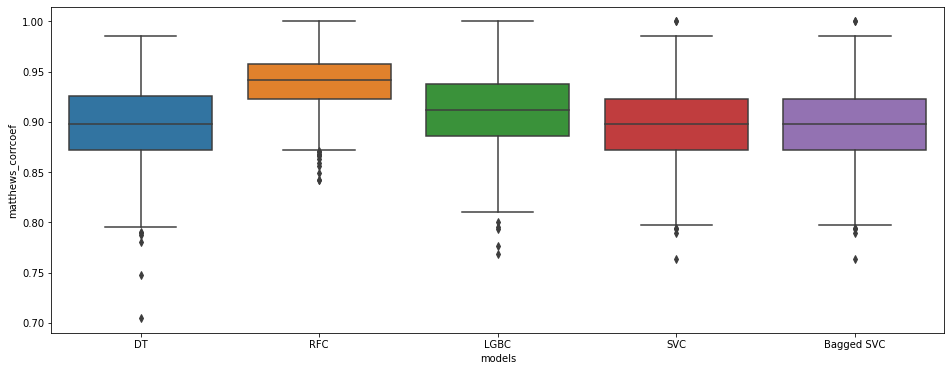

In [35]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([boot_DT,
                              boot_RFC, 
                              boot_LC, 
                              boot_SVC,
                              boot_Bag,
                            
                             ]),
             x=[x for x in  ('DT', 'RFC', 'LGBC', 'SVC', "Bagged SVC", 
              ) for y in range(1000)])
plt.xlabel('models')
plt.ylabel('matthews_corrcoef')
plt.show()

## Задание 3. Обучение и подбор параметров<a class="anchor" style="autocontent" id="Задание-3"/><br>


Загрузим датасет с рецептами (состав блюд и дополнительные данные о них) и рейтинге рецептов.

In [36]:
!gdown --id 1gr1WaAFZphKQxzUFIxAYqiTqRJsC-mFK -O recipes.csv

Downloading...
From: https://drive.google.com/uc?id=1gr1WaAFZphKQxzUFIxAYqiTqRJsC-mFK
To: /content/recipes.csv
100% 55.3M/55.3M [00:00<00:00, 133MB/s] 


In [37]:
recipies = pd.read_csv("recipes.csv")
print(recipies.iloc[:, 0:5].head())

                                         title  rating  calories  protein   fat
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   7.0
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0  23.0
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   7.0
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   NaN
4                    Spinach Noodle Casserole    3.125     547.0     20.0  32.0


In [38]:
recipies = recipies.loc[pd.isna(recipies).sum(axis=1) == 0, :]  # remove na
y = recipies['rating']
X = recipies.drop(["rating", "title"], axis=1)
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X.values, y.values, train_size=0.7, random_state=1999)

Постройте модель, предсказывающую рейтинг рецепта по всем имеющимся признакам.

Выберите 2 модели &mdash; один случайный лес и один бустинг из приведенных ниже.

1. `xgboost.XGBRegressor`
2. `xgboost.XGBRFRegressor` &mdash; случайный лес от xgboost
3. `lightgbm.LGBMRegressor`
4. `lightgbm.LGBMRegressor(boosting_type="rf")` &mdash; случайный лес от lightgbm
5. `catboost.CatBoostRegressor`

Кроме этого, используйте так же 
`TabNetRegressor`

Для первых двух моделей попытайтесь оптимизировать их параметры, чтобы получить хорошее качество 
Для TabNetRegressor попробуйте разные значения параметров `n_a` и `n_d`. Поставьте число эпох (`max_epochs`, параметр функции `fit`) равным 30 (можете при желании подбирать и этот параметр)

Сравните качество полученных моделей 

In [39]:
?xgboost.XGBRegressor

In [45]:
## ENTER YOUR CODE HERE ##

boost_model = GridSearchCV(xgboost.XGBRegressor(verbosity=1), {'max_depth':[1, 5, 10],
                                                    'n_estimators':[150],
                                                    
                                }, n_jobs=-1
                         ).fit(X_train_all, y_train_all)


[11:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AttributeError: ignored

In [51]:
y_pred = boost_model.predict(X_test)

In [56]:
boost_quality = mean_squared_error(y_pred, y_test)

In [57]:
rf_model = GridSearchCV(xgboost.XGBRFRegressor(verbosity=0), {'max_depth':[ 3, 5, 10],
                                                    
                                }, n_jobs=-1
                         ).fit(X_train_all, y_train_all)


AttributeError: ignored

In [74]:
y_pred_rf = rf_model.predict(X_test)
rf_boost_quality = mean_squared_error(y_pred_rf, y_test)

In [63]:
for a in [8,16]:
  
  tab_model = TabNetRegressor(n_a=a, n_d=a)
  tab_model.fit(X_train_all, y_train_all.reshape(-1, 1),max_epochs=10)
  y_pred_tab = tab_model.predict(X_test)
  tab_boost_quality = mean_squared_error(y_pred_tab, y_test)
  print('n_a and n_d: '+str(a))
  print(tab_boost_quality)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 10.40813|  0:00:04s
epoch 1  | loss: 3.6208  |  0:00:09s
epoch 2  | loss: 2.04205 |  0:00:13s
epoch 3  | loss: 1.79604 |  0:00:18s
epoch 4  | loss: 1.68372 |  0:00:23s
epoch 5  | loss: 1.67983 |  0:00:28s
epoch 6  | loss: 1.66424 |  0:00:32s
epoch 7  | loss: 1.65085 |  0:00:37s
epoch 8  | loss: 1.64108 |  0:00:42s
epoch 9  | loss: 1.62358 |  0:00:46s
n_a and n_d: 8
1.7192383333922945
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 13.4353 |  0:00:05s
epoch 1  | loss: 4.04464 |  0:00:10s
epoch 2  | loss: 2.13479 |  0:00:15s
epoch 3  | loss: 1.85126 |  0:00:20s
epoch 4  | loss: 1.7494  |  0:00:25s
epoch 5  | loss: 1.71152 |  0:00:30s
epoch 6  | loss: 1.67417 |  0:00:35s
epoch 7  | loss: 1.67171 |  0:00:40s
epoch 8  | loss: 1.64366 |  0:00:46s
epoch 9  | loss: 1.62722 |  0:00:51s
n_a and n_d: 16
1.7221031769399777


In [75]:
print('XGBRegressor: ' +str(boost_quality))
print('XGBRFRegressor: ' +str(rf_boost_quality))


XGBRegressor: 1.3608819206665181
XGBRFRegressor: 1.4556041002127147


Сравните качество моделей с гиперпараметрами, подобранными вручную и модели с гиперпараметрами, оптимизированной автоматически с помощью фреймворка [`optuna`](https://optuna.org/).

`optuna` используется для подбора гиперпараметров различных моделей машинного обучения и встретится в этом курсе ещё неоднократно. В частности для оптимизацииградиентного бустинга `LightGBM` используется функция `optuna.integration.lightgbm.LightGBMTunerCV`. 

Используйте параметры, полученные при оптимизации модели с помошью `optuna.integration.lightgbm.LightGBMTunerCV` для обучения модели `LightGBM`. 

Сравните качество полученных моделей.

In [ ]:
?optuna.integration.lightgbm.LightGBMTunerCV()

In [65]:
dtrain = optuna.integration.lightgbm.Dataset(X_train_all, label=y_train_all)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": 1,
    "boosting_type": "gbdt"}

tuner = optuna.integration.lightgbm.LightGBMTunerCV(params,
                                                    dtrain,
                                                    verbose_eval=False,
                                                    early_stopping_rounds=100,
                                                    time_budget=600,
                                                    folds=KFold(n_splits=4),
                                                    seed=42)

tuner.run()

print("\nBest score:", tuner.best_score)
best_params = tuner.best_params
print("\nBest parameters: ")
for key, value in best_params.items():
    print(f"{key}: {value}")

[I 2021-10-23 11:31:54,465] A new study created in memory with name: no-name-efb76ad7-2ead-4200-ae25-cd98f09be43c
  0%|          | 0/5 [00:00<?, ?it/s]


Best score: 1.1519962226307445

Best parameters: 
objective: regression
metric: rmse
verbosity: 1
boosting_type: gbdt
feature_pre_filter: False
lambda_l1: 0.0
lambda_l2: 0.0
num_leaves: 250
feature_fraction: 0.484
bagging_fraction: 1.0
bagging_freq: 0
min_child_samples: 20


In [67]:
model

LGBMRegressor(boosting_type={'bagging_fraction': 1.0, 'bagging_freq': 0,
                             'boosting_type': 'gbdt', 'feature_fraction': 0.484,
                             'feature_pre_filter': False, 'lambda_l1': 0.0,
                             'lambda_l2': 0.0, 'metric': 'rmse',
                             'min_child_samples': 20, 'num_leaves': 250,
                             'objective': 'regression', 'verbosity': 1})

In [69]:
y_train_all

array([5.   , 5.   , 5.   , ..., 0.   , 3.75 , 4.375])

In [71]:
## ENTER YOUR CODE HERE ##

model = lightgbm.LGBMRegressor(bagging_fraction=1.0, bagging_freq=0,
                             boosting_type='gbdt', feature_fraction=0.484,
                             feature_pre_filter=False, lambda_l1=0.0,
                             lambda_l2=0.0, metric='rmse',
                             min_child_samples=20, num_leaves=250,
                            )
model.fit(X_train_all, y_train_all)
y_pred_optuna = model.predict(X_test)

optuna_quality = mean_squared_error(y_pred_optuna, y_test)
print(optuna_quality)

1.376212721774135


ВЫВОД: XGBRegressor с вручную подобранными параметрами оказался самым лучшим (испоьзовалась RMSE). Чуть хуже был LGBMRegressor с параметрами, подобранными optuna

## Задание 4. Дисбаланс классов<a class="anchor" style="autocontent" id="Задание-4"/><br>

Загрузим датасет с различными биомаркерами пациентов с меланомой (обезличенный, информации о прациентах нет) и переменной, содержащей 1, если пациент ответил на иммунотерапию (терапия помогла пациенту и произошло уменьшении размеров опухоли) и 0, если не ответил. Количество пациентов, отвечающих на терапию сильно меньше пациентов, которым терапия не помогает, поэтому предсказание ответа пациента на терапию на основании биомаркеров &mdash; актуальная задача в онкологии. В данном задании вам предстоит попробовать её решить. 

In [76]:
!gdown --id 1yUxyIEyNNHHUyWAT0mLTFTaLx5slPG01 -O Cancer_dataset_2.tsv

Downloading...
From: https://drive.google.com/uc?id=1yUxyIEyNNHHUyWAT0mLTFTaLx5slPG01
To: /content/Cancer_dataset_2.tsv
100% 62.3k/62.3k [00:00<00:00, 24.7MB/s]


In [77]:
cancer = pd.read_table("/content/Cancer_dataset_2.tsv", index_col='sample_id')
display(cancer.head())

# split the data on features (x) and dependant variable (y)
y = cancer['Response']
x = cancer.drop('Response', axis=1)
print('\nNumber of patints responded to immunotherapy:')
display(y.value_counts())

,IgG1/IgA,IL21,CXCL9,CXCL10,CD8A,GZMB,KLRC2,KLRC3,KLRC4,GNLY,TGFB1,Response
sample_id,,,,,,,,,,,,
SAM4b0175e8db6e,3.242746,0.001280,-0.002986,-0.036366,0.096658,0.063467,0.502058,-0.083862,0.053659,0.091930,61.934119,0
SAMd215b503f99a,2.139016,-0.000089,0.030495,0.243958,0.161128,0.565798,-0.203495,-0.026902,-0.035405,0.030125,103.265837,0
SAM7fb6987514a4,12.614972,0.008103,0.502043,0.530783,0.388455,0.528142,-0.156209,0.001147,-0.028690,0.260703,53.552817,0
SAMd636e3461955,6.365973,-0.000139,0.024035,0.115127,0.084455,0.200038,-0.387373,-0.057837,0.045938,0.073192,80.837318,0
SAMc0da5d48686d,2.764089,0.006107,0.015533,0.135470,0.067686,0.053499,-0.116040,0.063714,0.088201,0.082940,114.422926,0



Number of patints responded to immunotherapy:


0    228
1     37
Name: Response, dtype: int64

В данном случае имеет место несбалансированность классов в наборе данных: пациентов, ответивших на терапию, гораздо меньше.

Есть два способа работы с несбалансированными по классам данными. Первый способ &mdash; это получение стратифицированных выборок. Необходимо иметь одинаковую долю образцов каждого класса в тренировочной и тестовой выборках, иначе возникает риск получения смещённых выборок, что приводит к некорректной оценке качества модели. Второй способ &mdash; это использование специальных алгоритмов, учитывающих несбалансированность классов.

Различные оценки эффективности модели также могут быть чувствительны к несбалансированным классам. Например, ROC-кривые склонны переоценивать эффективность модели при дисбалансе классов. В таком случае рекомендуется использовать кривые Precision-Recall (PR).

В данном задании вам нужно продемонстрировать эффективность различных подходов  работы с несбалансированными выборками. Для этого вы будете использовать три модели, представленные ниже: 

1. `RandomForestClassifier`, библиотека sklearn
2. `RandomForestClassifier с балансировкой классов`, библиотека sklearn  - меняет стандартный вес каждого класса, равный 1, на долю класса во входных данных.
3. `BalancedRandomForestClassifier`, библиотека imblearn - сэмплирует псевдовыборки таким образом, что в каждой псевдовыборке, которая подается на вход модели, баланс классов оказывается "выправлен".

Оцените эффективность подходов с помощью кросс-валидации, производя разбиение с учетом репрезентации классов и без него. В качестве метрики, отображающей эффективность модели, используйте значения `roc_auc` и `pr_auc`. Проинтерпретируйте результаты.

In [118]:
model1 = RandomForestClassifier()
kf = KFold(n_splits=5)

scores_RF_roc = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))


0.69 roc_auc with a standard deviation of 0.07


In [119]:
scores = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.36 pr_auc with a standard deviation of 0.07


In [120]:
skf = StratifiedKFold(n_splits=5)
scores_RF_roc = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))

0.70 roc_auc with a standard deviation of 0.04


In [121]:
scores = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.40 pr_auc with a standard deviation of 0.08


Стратификация улучшает обе метрики качества

In [122]:
model1 = RandomForestClassifier(class_weight='balanced')
scores_RF_roc = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))


0.72 roc_auc with a standard deviation of 0.07


In [123]:
scores = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.38 pr_auc with a standard deviation of 0.10


In [124]:
scores_RF_roc = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))

0.71 roc_auc with a standard deviation of 0.03


In [125]:
scores = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.43 pr_auc with a standard deviation of 0.07


Стратификация повлияла только на pr_auc

In [126]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [127]:
model1 = BalancedRandomForestClassifier()
scores_RF_roc = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))

0.73 roc_auc with a standard deviation of 0.06


In [128]:
scores = cross_val_score(model1, x, y, cv=kf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.39 pr_auc with a standard deviation of 0.08


In [129]:
scores_RF_roc = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores_RF_roc.mean(), scores_RF_roc.std()))

0.73 roc_auc with a standard deviation of 0.08


In [130]:
scores = cross_val_score(model1, x, y, cv=skf.get_n_splits(x, y), scoring='average_precision')
print("%0.2f pr_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.41 pr_auc with a standard deviation of 0.10


Стратификация повлияла только на pr_auc. В данном случае при несбалансирвоанной выборке это гораздо более репрезентативный параметр качества.

Лучшей оказалась вторая модель  RandomForestClassifier с балансировкой классов и стратифицированным сплитом

## Задание 5. Корреляция базовых моделей<a class="anchor" style="autocontent" id="Задание-5"/><br>

Для случайного леса, на примере датасета breast_cancer, постройте зависимость между попарными корреляциями базовых моделей и числом фичей, которые отбираются в каждую модель. 

Используйте функцию base_model_pair_correlation из лекции, модифицируйте ее с учетом того, что в отличии от `sklearn.ensemble.Bagging`, деревья в случайном лесу принимают все колонки X_train.

In [138]:
import itertools
def base_model_pair_correlation(ensemble, X):
    corrs = []
    for (i, est1), (j, est2) in itertools.combinations(enumerate(ensemble.estimators_), 2):
        Xi_test = X
        Xj_test = X
        
        
        if not isinstance(est1, sklearn.svm.SVC): 
            ypred_t1 = est1.predict_proba(Xi_test)[:, 1]
            
            ypred_t2 = est2.predict_proba(Xj_test)[:, 1]
        else:
            ypred_t1 = est1.decision_function(Xi_test)
            Xj_test = X_test.values
            ypred_t2 = est2.decision_function(Xj_test)
        corrs.append(scipy.stats.pearsonr(ypred_t1, ypred_t2)[0])
    return np.array(corrs)

In [139]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [140]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [141]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [142]:
base_model_pair_correlation(model, X_test)

array([0.75258749, 0.86920613, 0.8249694 , ..., 0.81332095, 0.82428276,
       0.95752831])

In [143]:
X_test.shape

(143, 30)

In [144]:
pair_correlations = {}
for i in range(2,30,5):
    model = RandomForestClassifier(max_features = i)
    model.fit(X_train, y_train)

    pair_correlations[str(i)] = base_model_pair_correlation(model, X_test)

In [ ]:
## ENTER YOUR CODE HERE ##

In [150]:
cor_res = pd.DataFrame(pair_correlations)
cor_res = cor_res.melt(value_vars=cor_res.columns,
                       ) 

In [151]:
cor_res.head()

,variable,value
0,2,0.744124
1,2,0.600943
2,2,0.744791
3,2,0.703428
4,2,0.744643


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Correlation')

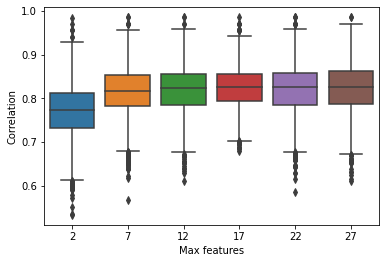

In [153]:
sns.boxplot(cor_res['variable'], cor_res['value'])
plt.xlabel('Max features')
plt.ylabel('Correlation')

Начиная с 12 (из 30) фичей корреляция между простыми моделями больше не растет. Чем меньше фичей подаем, тем меньше корреляция

## *Задание 6. Ансамблевое обучение<a class="anchor" style="autocontent" id="Задание-6"/><br>

В данной задаче вам нужно диагностировать сердечное заболевание у людей по [медицинским показателям](https://www.kaggle.com/ronitf/heart-disease-uci).


In [4]:
!gdown  --id 1VFbDK-Ad-hpf0_GGCBzn4thdn9mkQ-Y- -O heart.csv 
heart_dataset = pd.read_csv("/content/heart.csv")

Downloading...
From: https://drive.google.com/uc?id=1VFbDK-Ad-hpf0_GGCBzn4thdn9mkQ-Y-
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 9.94MB/s]


In [5]:
X = heart_dataset.drop("target", axis=1)
y = heart_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [21]:
np.unique(y)

array([0, 1])

Обучите разнообразные классификаторы, приведенные ниже, а также ансамбль `VotingClassifier` из `sklearn.ensemble`, объединяющий эти классификаторы с помощью жесткого или мякого голосования (параметр `voting =` `'hard'` или `'soft'` соответственно). Оцените качество моделей с помощью кросс-валидации на тренировочном наборе, используя функцию `cross_val_score` и метрику `f1`.

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
rng = np.random.RandomState(42)

dt = DecisionTreeClassifier(random_state=rng, max_depth=10, min_samples_leaf=10)
rf = RandomForestClassifier(n_estimators=50, random_state=rng)
etc = ExtraTreesClassifier(random_state=rng)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svc_lin = SVC(kernel='linear', probability=True, random_state=rng)
svc_rbf = SVC(kernel='rbf', probability=True, random_state=rng)
cat = catboost.CatBoostClassifier(verbose=0, random_seed=42)
lgbm = lightgbm.LGBMClassifier(random_state=42)
lgbm_rf = lightgbm.LGBMClassifier(boosting_type="rf", bagging_freq=1, bagging_fraction=0.7, random_state=42)
xgb = xgboost.XGBClassifier(random_state=42)
xgb_rf = xgboost.XGBRFClassifier(random_state=42)
lr = LogisticRegression(solver='liblinear', max_iter=10000)
nb = GaussianNB()

## START YOUR CODE HERE ##

voting_hard = VotingClassifier(estimators = [('dt', dt), ('rf', rf), ('etc',etc), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('lr', lr), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), ('xgb', xgb),
                                             ('xgb_rf', xgb_rf)],
                               voting='hard')
voting_soft = VotingClassifier(estimators = [('dt', dt), ('rf', rf), ('etc',etc), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('lr', lr), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), ('xgb', xgb),
                                             ('xgb_rf', xgb_rf)], voting='soft')

## END YOUR CODE HERE ##

for model in [dt, rf, cat, etc, knn, svc_lin, svc_rbf, xgb, lgbm, xgb_rf, lgbm_rf, lr, nb, voting_hard, voting_soft]: 
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=rng), scoring='f1')
    print(f'{model.__class__.__name__}: {scores.mean()}')

DecisionTreeClassifier: 0.7957693229810229
RandomForestClassifier: 0.7775258199977301
CatBoostClassifier: 0.8383007326745985
ExtraTreesClassifier: 0.8322016736650882
KNeighborsClassifier: 0.6182226182226181
SVC: 0.8386009216039275
SVC: 0.7014610456939684
XGBClassifier: 0.8408008259559123
LGBMClassifier: 0.830209411185021
XGBRFClassifier: 0.789126559714795
LGBMClassifier: 0.8294334975369457
LogisticRegression: 0.8262822448868961
GaussianNB: 0.8314176245210728
VotingClassifier: 0.8214210415348936
VotingClassifier: 0.8181039389502702


Вы можете заметить, что ансамбль показывает хорошее, но не лучшее качество предсказания, попробуем его улучшить. Как вы знаете, ансамбли работают лучше, когда модели, входящие в них не сккоррелированы друг с другом. Определите корреляцию предсказаний базовых моделей в ансамбле на тренировочном наборе, и удалите из ансамбля те модели, чьи предсказания будут сильнее коррелировать с остальными. Можете модифицировать функцию `base_model_pair_correlation` из предыдущего задания. 


In [17]:
import itertools
def base_model_pair_correlation_vot(ensemble, X):
    corrs = []
    for (i, est1), (j, est2) in itertools.combinations(enumerate(ensemble.named_estimators), 2):
        Xi_test = X
        Xj_test = X
        
        
        if not isinstance(est1, sklearn.svm.SVC): 
            ypred_t1 = est1.predict_proba(Xi_test)[:, 1]
            
            ypred_t2 = est2.predict_proba(Xj_test)[:, 1]
        else:
            ypred_t1 = est1.decision_function(Xi_test)
            Xj_test = X_test.values
            ypred_t2 = est2.decision_function(Xj_test)
        corrs.append(scipy.stats.pearsonr(ypred_t1, ypred_t2)[0])
    return np.array(corrs)

In [27]:
def voting_cor(estimators_list, X_train, y_train, X_test):
  corr_list = []
  est_1 = []
  est_2 = []
  for i in range(len(estimators_list)):
    model1 = estimators_list[i].fit(X_train, y_train)
    y_pred_1 = model1.predict_proba(X_test)[:,1]
    for j in range(i + 1, len(estimators_list)):
      model2 = estimators_list[j].fit(X_train, y_train)
      y_pred_2 = model2.predict_proba(X_test)[:,1]
      
      corr = scipy.stats.pearsonr(y_pred_1, y_pred_2)[0]
      corr_list.append(corr)
      est_1.append(estimators_list[i])
      est_2.append(estimators_list[j])

  out = pd.DataFrame()
  out['est_1'] = est_1
  out['est_2'] = est_2
  out['corr'] = corr_list
  return out


      
      

In [28]:
corrdf = voting_cor([dt, rf,etc, knn, svc_lin, svc_rbf, cat, lr, nb, lgbm, lgbm_rf, xgb, xgb_rf],
                    X_train, y_train, X_test)

In [32]:
corrdf['est_1'] = corrdf['est_1'].astype(str)
corrdf['est_2'] = corrdf['est_2'].astype(str)

In [35]:
corrdf.pivot(index='est_1', columns='est_2', values='corr')


est_2,<catboost.core.CatBoostClassifier object at 0x7fb290751710>,ExtraTreesClassifier(random_state=RandomState(MT19937) at 0x7FB2948836B0),GaussianNB(),KNeighborsClassifier(weights='distance'),"LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='rf',\n random_state=42)",LGBMClassifier(random_state=42),"LogisticRegression(max_iter=10000, solver='liblinear')","RandomForestClassifier(n_estimators=50,\n random_state=RandomState(MT19937) at 0x7FB2948836B0)","SVC(kernel='linear', probability=True,\n random_state=RandomState(MT19937) at 0x7FB2948836B0)","SVC(probability=True, random_state=RandomState(MT19937) at 0x7FB2948836B0)",XGBClassifier(random_state=42),XGBRFClassifier(random_state=42)
est_1,,,,,,,,,,,,
<catboost.core.CatBoostClassifier object at 0x7fb290751710>,NaN,NaN,0.853314,NaN,0.927813,0.951100,0.923101,NaN,NaN,NaN,0.969630,0.967367
"DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,\n random_state=RandomState(MT19937) at 0x7FB2948836B0)",0.894209,0.881579,0.741920,0.487680,0.881546,0.833528,0.829008,0.871343,0.831227,0.569159,0.868123,0.934173
ExtraTreesClassifier(random_state=RandomState(MT19937) at 0x7FB2948836B0),0.961306,NaN,0.874456,0.438271,0.899498,0.884595,0.921898,NaN,0.917996,0.576061,0.925189,0.942250
GaussianNB(),NaN,NaN,NaN,NaN,0.761730,0.816869,NaN,NaN,NaN,NaN,0.851916,0.834682
KNeighborsClassifier(weights='distance'),0.464652,NaN,0.497530,NaN,0.444892,0.436132,0.512503,NaN,0.490175,0.745543,0.434413,0.451531
"LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='rf',\n random_state=42)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887745,0.965077
LGBMClassifier(random_state=42),NaN,NaN,NaN,NaN,0.872393,NaN,NaN,NaN,NaN,NaN,0.980449,0.922774
"LogisticRegression(max_iter=10000, solver='liblinear')",NaN,NaN,0.940770,NaN,0.842891,0.871211,NaN,NaN,NaN,NaN,0.906157,0.906083
"RandomForestClassifier(n_estimators=50,\n random_state=RandomState(MT19937) at 0x7FB2948836B0)",0.962343,0.959357,0.841153,0.453083,0.914933,0.925090,0.911818,NaN,0.913247,0.578070,0.951369,0.969208


In [38]:
corrdf.pivot(index='est_1', columns='est_2', values='corr').mean(axis=0).sort_values()


est_2
KNeighborsClassifier(weights='distance')                                                                                0.459678
SVC(probability=True, random_state=RandomState(MT19937) at 0x7FB2948836B0)                                              0.617934
SVC(kernel='linear', probability=True,\n    random_state=RandomState(MT19937) at 0x7FB2948836B0)                        0.788161
GaussianNB()                                                                                                            0.789620
LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='rf',\n               random_state=42)               0.792895
LGBMClassifier(random_state=42)                                                                                         0.798235
<catboost.core.CatBoostClassifier object at 0x7fb290751710>                                                             0.799441
LogisticRegression(max_iter=10000, solver='liblinear')                                     

Удалим все, у которых средняя корреляция > 0,80


Создайте новый ансамбль, на исправленном наборе моделей и оцените его качество с помощью кросс-валидации на тренировочном наборе, используя функцию `cross_val_score` и метрику `f1`.

In [39]:
## START CODE HERE ##

voting_hard_2 = VotingClassifier(estimators = [('dt', dt), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat),  ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), 
                                             ],
                               voting='hard')
voting_soft_2 = VotingClassifier(estimators = [('dt', dt), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), 
                                             ],
                               voting='soft')

## END CODE HERE ##

for model in [voting_hard_2, voting_soft_2]:
    scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=rng), scoring='f1')
    print(f'{model.__class__.__name__}: {scores.mean()}')

VotingClassifier: 0.8313751700599493
VotingClassifier: 0.8241729872164655


Обучите все получившиеся модели на тренировочном наборе и испытайте их качество на тестовом наборе. Получилось ли у улучшенных версий ансамблевого классификатора превзойти базовые модели, входящие в него и свои предыдущие версии? 

In [41]:
from sklearn.metrics import f1_score

In [45]:
rng = np.random.RandomState(42)

dt = DecisionTreeClassifier(random_state=rng, max_depth=10, min_samples_leaf=10)
rf = RandomForestClassifier(n_estimators=50, random_state=rng)
etc = ExtraTreesClassifier(random_state=rng)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svc_lin = SVC(kernel='linear', probability=True, random_state=rng)
svc_rbf = SVC(kernel='rbf', probability=True, random_state=rng)
cat = catboost.CatBoostClassifier(verbose=0, random_seed=42)
lgbm = lightgbm.LGBMClassifier(random_state=42)
lgbm_rf = lightgbm.LGBMClassifier(boosting_type="rf", bagging_freq=1, bagging_fraction=0.7, random_state=42)
xgb = xgboost.XGBClassifier(random_state=42)
xgb_rf = xgboost.XGBRFClassifier(random_state=42)
lr = LogisticRegression(solver='liblinear', max_iter=10000)
nb = GaussianNB()

## START YOUR CODE HERE ##

voting_hard = VotingClassifier(estimators = [('dt', dt), ('rf', rf), ('etc',etc), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('lr', lr), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), ('xgb', xgb),
                                             ('xgb_rf', xgb_rf)],
                               voting='hard')
voting_soft = VotingClassifier(estimators = [('dt', dt), ('rf', rf), ('etc',etc), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('lr', lr), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), ('xgb', xgb),
                                             ('xgb_rf', xgb_rf)], voting='soft')

voting_hard_2 = VotingClassifier(estimators = [('dt', dt), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat), ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), 
                                             ],
                               voting='hard')
voting_soft_2 = VotingClassifier(estimators = [('dt', dt), ('knn', knn),
                                             ('svc_lin', svc_lin), ('svc_rbf', svc_rbf), 
                                             ('cat', cat),  ('nb', nb),
                                             ('lgbm', lgbm), ('lgbm_rf', lgbm_rf), 
                                             ],
                               voting='soft')


for model in [dt, rf, cat, etc, knn, svc_lin, svc_rbf, xgb, lgbm, xgb_rf, lgbm_rf, lr, nb, 
              voting_hard, voting_soft,voting_hard_2, voting_soft_2]: 
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test,y_pred, )

    
    print(f'{model.__class__.__name__}: {f1}')

DecisionTreeClassifier: 0.8333333333333333
RandomForestClassifier: 0.8571428571428572
CatBoostClassifier: 0.8333333333333333
ExtraTreesClassifier: 0.8641975308641976
KNeighborsClassifier: 0.7380952380952381
SVC: 0.8809523809523809
SVC: 0.7628865979381443
XGBClassifier: 0.8536585365853658
LGBMClassifier: 0.8
XGBRFClassifier: 0.8333333333333333
LGBMClassifier: 0.8735632183908046
LogisticRegression: 0.8809523809523809
GaussianNB: 0.888888888888889
VotingClassifier: 0.8470588235294119
VotingClassifier: 0.8604651162790697
VotingClassifier: 0.8571428571428572
VotingClassifier: 0.8705882352941177


У улучшенных ансамблей классификаторов получилось превзойти свои предыдущие версии, однако некоторые базовые класификаторы (логистическая регрессия, GaussianNB, SVC с линейным ядром) оказались немного лучше